In [75]:
import math
import numpy as np
import pandas as pd

In [9]:
# Path file passwords2.txt
file = "data\passwords\passwords1.txt"
# Read and split lines to avoid \n
with open(file) as f:
    passwords = f.read().splitlines()

In [10]:
# Print some results
passwords[:10]

['JV#0$S;D@j+c96/8C(W%',
 "J,)e+LH'ENmdV5YGWu4B",
 'tR0V2@$SNuU9;<&DafxO',
 '/DXhI;GNl*nbCzKso=?@',
 'b*ZB/egd=!XcvV>K(qY@',
 '9hcHA"2)#=$jIypGs1(7',
 ';FWwk1Bc-%DqAm@nfMPd',
 'q(kzd\'ow%"j03+aXbtEU',
 '?!Eq,wm#Z8/lo$GXjQc.',
 '>6@mb/NSk:K&t4gzpYsv']

In [16]:
n = len(passwords)
n

100000000

In [24]:
# creating the table_size value:
# Here the table size can be taken as 2^30
# Adapting Knuth’s suggestion, c to be fraction of the form s / 2^32
# where s is an integer in the range 0 < s < 2^w
table_size=2^30
w=32
s=2^15
c=s/(2^32)


In [92]:
class BloomFilter(object):
     
    def __init__(self, n_items, fp_prob):
        self.fp_prob = fp_prob
        self.n_items = n_items
        self.array_len = self.get_array_len(self.n_items, self.fp_prob)
        self.hash_count = self.get_hash_count(self.n_items, self.array_len)
        self.array = np.zeros(self.array_len)

    def get_array_len(self, n, p):
        m = -(n*np.log(p))/((np.log(2)**2))
        return int(m)

    def get_hash_count(self, n, m):
        k = (m/n)*np.log(2)
        return int(k)

    def hash_mul(self, s, seed):
        m = self.array_len
        pwr = 1
        key = 0
        for _, character in enumerate(s):
            key = (key+ (ord(character)*pwr)%m ) %m
            pwr=(pwr*128)%m
        A = 0.618 / seed
        h = math.floor(m * ((key*A)%1))
        return int(h)

    def add(self, item):
        for i in range(1, self.hash_count + 1):
            index = self.hash_mul(item, i)
            self.array[index] = 1

    def exists(self, item):
        exists = True
        for i in range(1, self.hash_count + 1):
            index = hash_mul(item, i)
            exists = (self.array[index] == 1)
            if not exists:
                break
        return exists
    
    def describe(self):
        print("False-prositive probability: ", self.fp_prob)
        print("Number of items: ", self.n_items)
        print("Array length: ", self.array_len)
        print("Number of hash functions needed: ", self.hash_count)

#### Creating hash table:

In [77]:
BF = BloomFilter(n, 0.01)
m = BF.array_len
k = BF.hash_count

In [78]:
print(m)
print(k)

958505837
6


In [79]:
ls_hash=[]
for pwd in passwords[:30000]:
    for i in range(1, k+1):
        ls_hash.append(hash_mul(pwd, m, i))

In [80]:
# Print some results
hash_series = pd.Series(ls_hash)
hash_series.describe()

count    1.800000e+05
mean     4.772056e+08
std      2.770036e+08
min      0.000000e+00
25%      2.377094e+08
50%      4.763774e+08
75%      7.169623e+08
max      9.581224e+08
dtype: float64

In [81]:
print("hash_series out of range: ", hash_series.max() > m)

hash_series out of range:  False


In [82]:
import matplotlib.pyplot as plt

(array([3731., 3836., 3692., 3589., 3575., 3530., 3496., 3625., 3581.,
        3625., 3581., 3654., 3611., 3502., 3597., 3574., 3692., 3648.,
        3687., 3622., 3613., 3638., 3576., 3605., 3590., 3575., 3507.,
        3567., 3559., 3493., 3634., 3570., 3588., 3665., 3731., 3570.,
        3619., 3552., 3573., 3581., 3596., 3522., 3553., 3619., 3599.,
        3521., 3560., 3648., 3566., 3562.]),
 array([0.00000000e+00, 1.91624487e+07, 3.83248974e+07, 5.74873461e+07,
        7.66497948e+07, 9.58122435e+07, 1.14974692e+08, 1.34137141e+08,
        1.53299590e+08, 1.72462038e+08, 1.91624487e+08, 2.10786936e+08,
        2.29949384e+08, 2.49111833e+08, 2.68274282e+08, 2.87436730e+08,
        3.06599179e+08, 3.25761628e+08, 3.44924077e+08, 3.64086525e+08,
        3.83248974e+08, 4.02411423e+08, 4.21573871e+08, 4.40736320e+08,
        4.59898769e+08, 4.79061218e+08, 4.98223666e+08, 5.17386115e+08,
        5.36548564e+08, 5.55711012e+08, 5.74873461e+08, 5.94035910e+08,
        6.13198358e+08, 

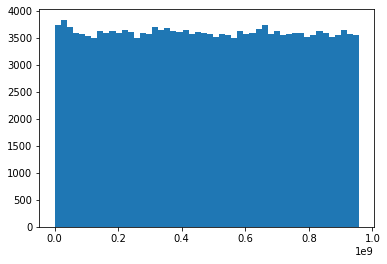

In [83]:
plt.hist(ls_hash, bins = 50)

### Test

Now we'll add 30k password to the bloom filter and then we'll take a look at the final array.

In [93]:
n = 30000
BF = BloomFilter(n, 0.01)
BF.describe()

False-prositive probability:  0.01
Number of items:  30000
Array length:  287551
Number of hash functions needed:  6


In [95]:
for pwd in passwords[:n]:
    BF.add(pwd)

In [98]:
BF.array

array([1., 0., 0., ..., 0., 0., 0.])